In [ ]:
# Andrey Matynenko
# AutoValue: Car Price Prediction with Scikit-Learn
# Individual ML Exercise

In [ ]:
# Import NumPy, Pandas, and Scikit-Learn
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# Import the car_price_prediction_.csv dataset into notebook.
data = pd.read_csv('/content/car_price_prediction_.csv')

In [ ]:
# Inspect the dataset shape.
data.shape

(2500, 10)

In [ ]:
# Inspect the dataset shape.
data

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [ ]:
# Inspect the dataset shape/Summary Statistics.
data.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [ ]:
# Handle any missing values by using a median imputation method.
x = x.fillna(x.median())

# Inspect the dataset shape/Check for a missing values.
data.isnull().sum()

,0
Year,0
Engine Size,0
Mileage,0
Price,0
Brand_BMW,0
Brand_Ford,0
Brand_Honda,0
Brand_Mercedes,0
Brand_Tesla,0
Brand_Toyota,0


In [ ]:
# Prepare dataset for the model building/Drop unnecessary columns.
data = data.drop(columns=['Car ID', 'Model'])

In [ ]:
# Show result.
data.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10


In [ ]:
# Create a corellations matrix
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

                         Year  Engine Size   Mileage     Price  Brand_BMW  \
Year                 1.000000     0.011833  0.002282 -0.036805  -0.001535   
Engine Size          0.011833     1.000000 -0.015782 -0.004420  -0.006505   
Mileage              0.002282    -0.015782  1.000000 -0.008567   0.005661   
Price               -0.036805    -0.004420 -0.008567  1.000000   0.022757   
Brand_BMW           -0.001535    -0.006505  0.005661  0.022757   1.000000   
Brand_Ford          -0.004386    -0.008031  0.019793 -0.015369  -0.164125   
Brand_Honda          0.024080     0.033684  0.003357 -0.008718  -0.165495   
Brand_Mercedes       0.016718    -0.018717 -0.026348  0.008218  -0.165769   
Brand_Tesla         -0.026305    -0.010656  0.005472  0.012341  -0.164399   
Brand_Toyota         0.017259     0.013707 -0.008693 -0.008596  -0.171469   
Fuel Type_Electric  -0.004634     0.037088 -0.037988 -0.032093   0.008158   
Fuel Type_Hybrid     0.003521    -0.009747  0.023850 -0.001868  -0.000169   

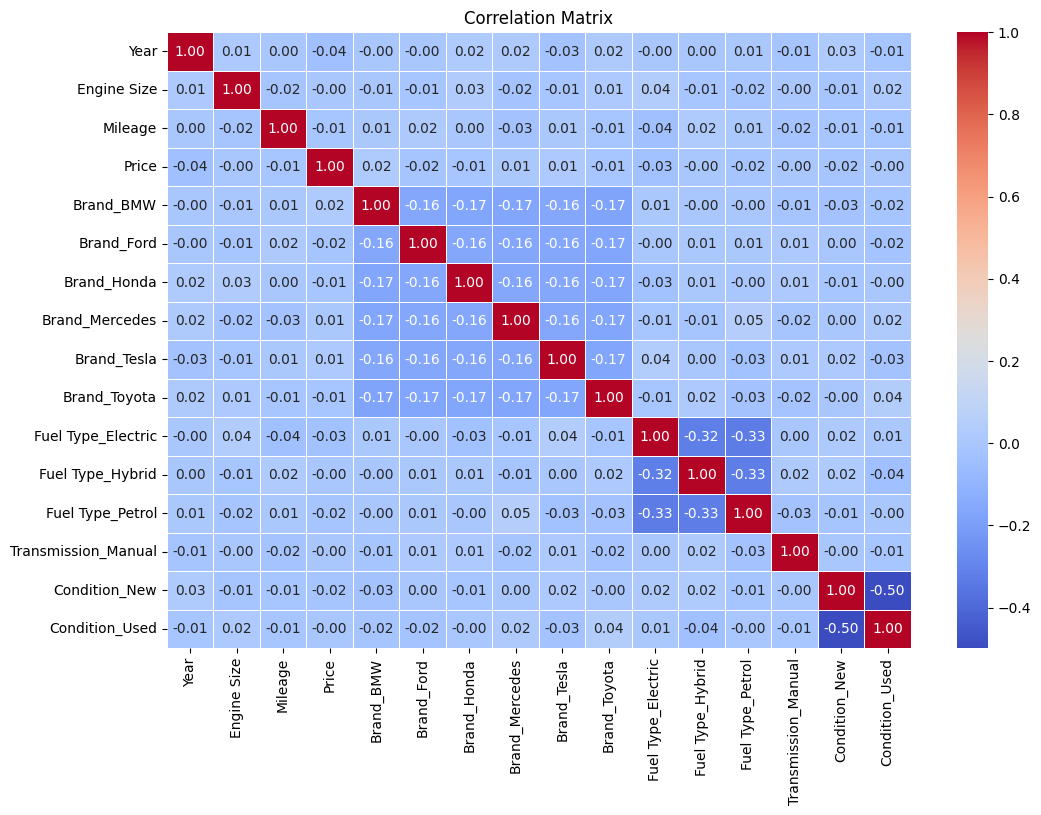

In [ ]:
# Import seaborn
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Transform categorical variables in the dataset into numerical form.
data = pd.get_dummies(data, columns=['Brand', 'Fuel Type', 'Transmission', 'Condition'], drop_first=True)

In [ ]:
# Define features and target variable for model building.
features = data.columns.difference(['Price'])
x = data[features] # All columns except Price would be my features.
y = data['Price'] # Target variable.

In [ ]:
# Import functions from Scikit-Learn for Machine Learning operations.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training, 30% test

In [ ]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
# Calculate RMSE for the Model 1: Linear Regression.
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))

In [ ]:
# Model 2: Decision Tree
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [ ]:
# Calculate RMSE for the Model 2: Decision Tree.
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))

In [ ]:
# Model 3: Random Forest
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [ ]:
# Calculate RMSE for the Model 3: Random Forest.
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

In [ ]:
# Display the Root mean square error (RMSE) results for each model.
print("Model Performance Comparison:")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Random Forest RMSE: {rmse_rf}")

Model Performance Comparison:
Linear Regression RMSE: 27473.229598501737
Decision Tree RMSE: 40003.437874976524
Random Forest RMSE: 28273.13273488242
